In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

Для распараллеливания была выбрана следующая стратегия: сначала нулевой процесс считывает все данные, затем части поля передаются другим процессам. При этом все поле делится на $k$ "полос", где $k$ - количество процессоров. Первая полоса остается первому процессу, чтобы тот тоже совершал полезную работу. Для корректной работы программы $N$ должно делиться на $k$, где $N$ - размер стороны поля.

Далее происходит $M$ итераций игры жизнь. При этом внутри итерации происходит передача данных между процессами:
* Каждый процесс, кроме последнего посылает "вниз" свою нижнюю полоску, при этом у последнего процесса пришедшая снизу полоса считается заполненной нулями, далее каждый процесс кроме первого принимает полосу "сверху", при этом у первого эта полоса считаеся заполненой нулями
* Далее по аналогии каждый процесс кроме первого посылает "вверх" свою верхнюю полоску
* После этих обновлений, происходит перерасчет живых клеток полоске каждого процесса с учетом пришедших данных

После $M$ таких итераций все полоски посылаются в нулевому процессу, который записывает результат в выходной файл.

Это несложный способ распараллелить игру жизнь, получив при этом значительный прирост в производительности на на поле большого размера.

При тестировании эффективности в зависимости от количества процессов получились следующие результаты:

In [2]:
runtime = {
    1: 105.400991, 2: 54.483100, 3: 36.566032, 4: 27.257634, 5: 21.937078, 6: 18.456865, 8: 13.924181, 10: 11.148699,
    12: 9.249541, 15: 7.506666, 16: 7.051340, 20: 5.706632, 24: 4.878058, 25: 4.679039, 30: 4, 50: 2, 60: 1.6
}

Text(0,0.5,'seconds')

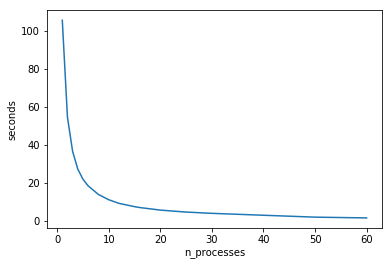

In [3]:
x = list(runtime.keys())
y = list(map(lambda k: runtime[k], x))
plt.plot(x, y)
plt.xlabel('n_processes')
plt.ylabel('seconds')

Видно, что после 20 процессов ускорение замедляется. Возможно, это происходит из-за того, что при увеличении количества процессов, накладные расходы на передачу сообщений между ними также увеличиваются.

При тестировании зависимости от размера поля получились следующие результаты:

In [4]:
n_proc = {
    1: {100: 0.792953, 500: 18.584946, 1000: 73.229126},
    2: {100: 0.434911, 500: 09.384645, 1000: 37.456730},
    4: {100: 0.431411, 500: 04.950927, 1000: 19.448993}
}

Text(0,0.5,'seconds')

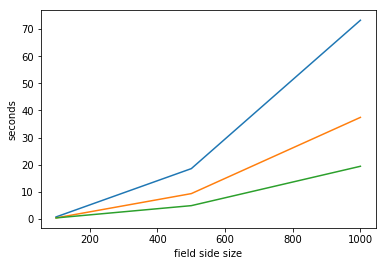

In [5]:
x = [100, 500, 1000]
y1 = list(map(lambda k: n_proc[1][k], x))
y2 = list(map(lambda k: n_proc[2][k], x))
y3 = list(map(lambda k: n_proc[4][k], x))
plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)
plt.xlabel('field side size')
plt.ylabel('seconds')

Видно, что при увеличении количества процессов в 2 раза, происходит ускорение в 2 раза.

При тестировании в зависимости от количества итераций получились следующие результаты:

In [6]:
n_proc = {
    1: {100: 0.941369, 1000: 7.818264, 10000: 73.262802, 100000: 725.081342},
    2: {100: 0.523893, 1000: 4.072218, 10000: 37.641429, 100000: 373.965723},
    4: {100: 0.295428, 1000: 2.047412, 10000: 18.881073, 100000: 183.744360},
    8: {100: 0.150673, 1000: 2.427034, 10000: 09.204513, 100000: 091.242467}
}

Text(0,0.5,'seconds')

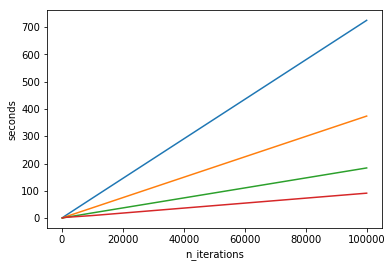

In [7]:
x = [100, 1000, 10000, 100000]
y1 = list(map(lambda k: n_proc[1][k], x))
y2 = list(map(lambda k: n_proc[2][k], x))
y3 = list(map(lambda k: n_proc[4][k], x))
y4 = list(map(lambda k: n_proc[8][k], x))
plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)
plt.plot(x, y4)
plt.xlabel('n_iterations')
plt.ylabel('seconds')

Для количества итераций видно, что при увеличении количества процессов в 2 раза скорость также увеличивается в 2 раза.